<h1><center>A/B Testing</center><h1>

## Project Scoping

#### Project Goal

The goal of this project is to demonstrate data analysis technques, using Python. This will be achieved by conducting an A/B test, a process typical for e-commerce businesses.

#### The data

The data were provided by Ahmed Dawoud in kaggle. They belong to an e-commerce company that developed a new web page. I will be using the dataset to determine how this new web page increases the conversion rate, i.e. the number of custmers who eventually pay for a product.
(source: https://www.kaggle.com/ahmedmohameddawoud/ecommerce-ab-testing)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#load and check data
ab_test = pd.read_csv("ab_test.csv")
countries = pd.read_csv("countries_ab.csv")
print(ab_test.head())
print(countries.head())

       id     time  con_treat      page  converted
0  851104  11:48.6    control  old_page          0
1  804228  01:45.2    control  old_page          0
2  661590  55:06.2  treatment  new_page          0
3  853541  28:03.1  treatment  new_page          0
4  864975  52:26.2    control  old_page          1
       id country
0  834778      UK
1  928468      US
2  822059      UK
3  711597      UK
4  710616      UK


#### Analysis

For the analysis, I will have to find the baseline conversion rate, the minimum detectable effect and the statistical significance threshold to determine if the results are statistically signifcant.

#### Evaluation

The evaluation will depend on the hypothesis testing.

#### Output

The output will be visulaized.

## Data Wranglying and Tidying

Before starting with the analysis, it is important to make sure that the dataset is n a usable form. The first step is to merge the two datasets:

In [3]:
data = ab_test.merge(countries, 'outer', on='id')
data.head()

,id,time,con_treat,page,converted,country
0,851104,11:48.6,control,old_page,0,US
1,804228,01:45.2,control,old_page,0,US
2,661590,55:06.2,treatment,new_page,0,US
3,853541,28:03.1,treatment,new_page,0,US
4,864975,52:26.2,control,old_page,1,US


In [4]:
#check data types
print(data.dtypes)

id            int64
time         object
con_treat    object
page         object
converted     int64
country      object
dtype: object


The dataset and the data types are already in a correct format. It is also important to check for missing variables:

In [5]:
data.isnull().sum()

id           0
time         0
con_treat    0
page         0
converted    0
country      0
dtype: int64

There are no missing values. The dataset is ready for analysis.

## Analysis

#### Baseline conversion rate

The baseline conversion rate is an estimate of the percent of people who will buy the company's products under the old website design.

In [6]:
data['labels'] = ['Not converted' if x == 0 else 'Converted' for x in data.converted]
old = data[data['page'] == 'old_page']

old_visitors = old.id
old_paying_visitors = old[old['converted'] == 1].converted

old_visitor_count = len(old_visitors)
old_paying_visitor_count = len(old_paying_visitors)

baseline_percent = 100 *(old_paying_visitor_count/old_visitor_count)
baseline_percent

12.047759085568362

Under the current website desgn, the company can expect that around 12% of its visitors will pay for its products.

<AxesSubplot:title={'center':'Conversion rate with the old website'}>

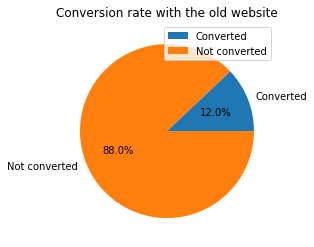

In [7]:
old.groupby('labels').count().plot(kind = "pie", y = 'converted', ylabel = "", title = "Conversion rate with the old website",autopct='%1.01f%%')


#### Minimum detectable effect

The minimum detectable effect, or MDE, expresses the minimum difference the company would like to have from changing its web page. It is generally expressed as a pecent of the baseline conversion rate. For this case, I will assume that the company wants to increase its baseline conversion rate to 15%.

In [8]:
new_baseline = 15

mde = (new_baseline - baseline_percent)/baseline_percent *100
mde

24.504481650600365

The minimum desired lift is 24.5%

#### Statistical significance threshold

The significance threshold is the false positive rate for the test: the probability of finding a significant difference when there really is none. For this case, I will choose a significance level of 5%.

Using an online sample calculator, I find that for the A/B test to be significant at 5%, a sample of 4,230 people needs to be used.

In [9]:
new = data[data['page'] == "new_page"]
len(new)

147239

The test was done on a sufficiently big sample.

## Evaluation

In [10]:
new_visitors = new.id
new_paying_visitors = new[new['converted'] == 1].converted

new_visitor_count = len(new_visitors)
new_paying_visitor_count = len(new_paying_visitors)

new_conversion_rate = 100 *(new_paying_visitor_count/new_visitor_count)
new_conversion_rate

11.884079625642663

<AxesSubplot:title={'center':'Conversion rate with the new website'}>

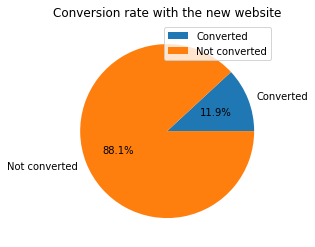

In [11]:
new.groupby('labels').count().plot(kind = "pie", y = 'converted', ylabel = "", title = "Conversion rate with the new website",autopct='%1.01f%%')


The new website does not increase the conversion rate. It actually reduces it. The company should not invest in redesigning its webpage. But maybe the results are different when looking at different countries.

#### Country analysis

In [12]:
data.country.unique()

array(['US', 'CA', 'UK'], dtype=object)

There are three different countries included in the dataset: US, Canada, UK.

In [13]:
us = data[data.country == 'US']

old_us = us[us['page'] == 'old_page']

old_visitors_us = old_us.id
old_paying_visitors_us = old_us[old_us['converted'] == 1].converted

old_visitor_count_us = len(old_visitors_us)
old_paying_visitor_count_us = len(old_paying_visitors_us)

baseline_percent_us = 100 *(old_paying_visitor_count_us/old_visitor_count_us)
baseline_percent_us

12.078512757353298

<AxesSubplot:title={'center':'Conversion rate with the old website in the US'}>

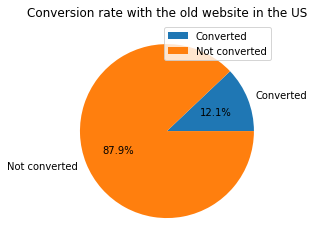

In [14]:
old_us.groupby('labels').count().plot(kind = "pie", y = 'converted', ylabel = "", title = "Conversion rate with the old website in the US",autopct='%1.01f%%')


Currently, around 12% of the company's website visitors pay for its products in the US. Let's assume again that the desired baseline conversion rate is 15%.

In [15]:
new_baseline_us = 15

mde_us = (new_baseline_us - baseline_percent_us)/baseline_percent_us *100
mde_us

24.187474909674826

In [16]:
new_us = us[us['page'] == "new_page"]
len(new_us)

103247

With these parameters, the sample size would need to be at least 4,290. But in this case, the sample is bigger, so the results re significant at the 5% level.

11.841506290739682


<AxesSubplot:title={'center':'Conversion rate with the new website in the US'}>

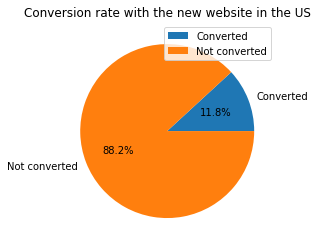

In [17]:
new_visitors_us = new_us.id
new_paying_visitors_us = new_us[new_us['converted'] == 1].converted

new_visitor_count_us = len(new_visitors_us)
new_paying_visitor_count_us = len(new_paying_visitors_us)

new_conversion_rate_us = 100 *(new_paying_visitor_count_us/new_visitor_count_us)
print(new_conversion_rate_us)

new_us.groupby('labels').count().plot(kind = "pie", y = 'converted', ylabel = "", title = "Conversion rate with the new website in the US",autopct='%1.01f%%')


Once again, the new website results in a lower conversion rate in the US. Therefore, the website should remain as it is.

11.98414422241529


<AxesSubplot:title={'center':'Conversion rate with the old website in the UK'}>

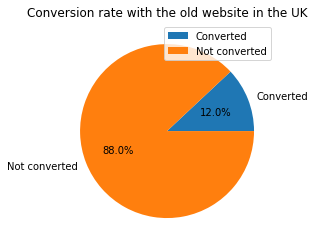

In [18]:
uk = data[data.country == 'UK']

old_uk = uk[uk['page'] == 'old_page']

old_visitors_uk = old_uk.id
old_paying_visitors_uk = old_uk[old_uk['converted'] == 1].converted

old_visitor_count_uk = len(old_visitors_uk)
old_paying_visitor_count_uk = len(old_paying_visitors_uk)

baseline_percent_uk = 100 *(old_paying_visitor_count_uk/old_visitor_count_uk)
print(baseline_percent_uk)

old_uk.groupby('labels').count().plot(kind = "pie", y = 'converted', ylabel = "", title = "Conversion rate with the old website in the UK",autopct='%1.01f%%')


Currently, around 12% of the company's website visitors pay for its products in the UK. Let's assume again that the desired baseline conversion rate is 15%.

In [19]:
new_baseline_uk = 15

mde_uk = (new_baseline_uk - baseline_percent_uk)/baseline_percent_uk *100
print(mde_uk)

new_uk = uk[uk['page'] == "new_page"]
print(len(new_uk))

25.16538287267785
36587


With these parameters, the sample size would need to be at least 2,650. But in this case, the sample is bigger, so the results re significant at the 5% level.

12.132724738295023


<AxesSubplot:title={'center':'Conversion rate with the new website in the UK'}>

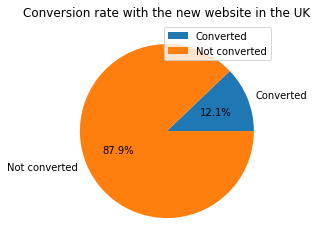

In [20]:
new_visitors_uk = new_uk.id
new_paying_visitors_uk = new_uk[new_uk['converted'] == 1].converted

new_visitor_count_uk = len(new_visitors_uk)
new_paying_visitor_count_uk = len(new_paying_visitors_uk)

new_conversion_rate_uk = 100 *(new_paying_visitor_count_uk/new_visitor_count_uk)
print(new_conversion_rate_uk)

new_uk.groupby('labels').count().plot(kind = "pie", y = 'converted', ylabel = "", title = "Conversion rate with the new website in the UK",autopct='%1.01f%%')


Even though the new website does not achieve the desired conversion rate, it does increase it. The company should investigate whether the investment to change the website in the UK is worth it.

11.934156378600823


<AxesSubplot:title={'center':'Conversion rate with the old website in Canada'}>

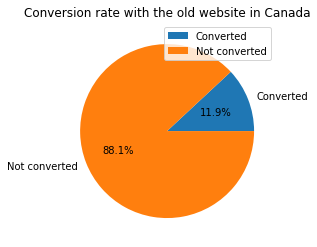

In [21]:
ca = data[data.country == 'CA']

old_ca = ca[ca['page'] == 'old_page']

old_visitors_ca = old_ca.id
old_paying_visitors_ca = old_ca[old_ca['converted'] == 1].converted

old_visitor_count_ca = len(old_visitors_ca)
old_paying_visitor_count_ca = len(old_paying_visitors_ca)

baseline_percent_ca = 100 *(old_paying_visitor_count_ca/old_visitor_count_ca)
print(baseline_percent_ca)

old_ca.groupby('labels').count().plot(kind = "pie", y = 'converted', ylabel = "", title = "Conversion rate with the old website in Canada",autopct='%1.01f%%')


Currently, around 11.9% of the company's website visitors pay for its products in the UK. Let's assume again that the desired baseline conversion rate is 15%.

In [22]:
new_baseline_ca = 15

mde_ca = (new_baseline_ca - baseline_percent_ca)/baseline_percent_ca *100
print(mde_ca)

new_ca = ca[ca['page'] == "new_page"]
print(len(new_ca))

25.68965517241379
7405


With these parameters, the sample size would need to be at least 3,890. But in this case, the sample is bigger, so the results re significant at the 5% level.

11.2491559756921


<AxesSubplot:title={'center':'Conversion rate with the new website in Canada'}>

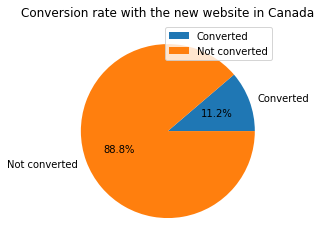

In [23]:
new_visitors_ca = new_ca.id
new_paying_visitors_ca = new_ca[new_ca['converted'] == 1].converted

new_visitor_count_ca = len(new_visitors_ca)
new_paying_visitor_count_ca = len(new_paying_visitors_ca)

new_conversion_rate_ca = 100 *(new_paying_visitor_count_ca/new_visitor_count_ca)
print(new_conversion_rate_ca)

new_ca.groupby('labels').count().plot(kind = "pie", y = 'converted', ylabel = "", title = "Conversion rate with the new website in Canada",autopct='%1.01f%%')


Once again, the new website results in a lower conversion rate in Canada. Therefore, the website should remain as it is.

## Conclusion

After analysing the data, both at an aggregate and at a country-specific level, I have concluded that the company should not change its website. A change in website would not cause the conversion rate to increase. It would actually cause it to fall. The only exception is the UK, where the new website lifts the conversion rate by approxiamtely 0.1%. The company should evaluate whether changing its website exclusively in the UK is worth the investment.

## Next steps

If the company would like to look into the matter more closely, I would recommend doing a usage funnel analysis to find out in what step the customers decide to not buy and then try to improve the website based on that.